<p style="text-align: justify">The last year around the world was marked by the SARS-CoV-2 virus pandemic causing the COVID-19 disease. It caused millions of people to die, tens of millions became ill, hundreds of millions were quarantined, and billions of people have had their lives changed. The pandemic, although it continues to develop, and new people are still ill in the world, there is light in this dark tunnel - a vaccine. Although the virus is new, after a year, thanks to the work of scientists from around the world, we have several vaccines that are safe and have high effectiveness (against the virus and / or against the severe course of the disease). So humanity has a great challenge to vaccinate as many people as possible to get rid virus and its consequences once and for all (vaccine only works for a few years, so it is important that the mass vaccination process runs smoothly).</p>

<p style="text-align: justify">Today we will look at the vaccination process in relation to countries, in particular one that has been at the forefront of this issue since the first vaccinations - Israel. Israel is a country in the Middle East, located in Western Asia on the eastern shore of the Mediterranean Sea. The country has an area of less than 21,000 km2 and a population of less than 9 million people. Why is this country called a leader in SARS-CoV-2 vaccination? </p>

<p style="text-align: justify">The world's media are looking for an answer to the question and indicate at least a few reasons that could have contributed to becoming a leader. These include:</p>

* Tough negotiations and high price for vaccines (it has not been publicly announced how many vaccines have been purchased),
* Current government pressure on vaccination with waning support to restore public confidence,
* Information campaigns, involvement of representatives of various religions,
* Simplify the vaccination process (it only takes a few minutes),
* High mobility of vaccination points (even appear in bars and on beaches),
* The willingness and pressure of society to face the huge number of infections in the fall 2020,
* A modern and good healthcare system,
* Controversy over the lack of vaccination for Palestine,
* Willingness of many citizens to promote vaccination campaigns.

However, we ourselves look for answers by analyzing various data, looking in a different way than the media.

In [1]:
options(warn = -1)
options(scipen = 10000)
options(repr.plot.width = 13.8, repr.plot.height = 9.2)

library(tidyverse)
library(scales)
library(RColorBrewer)
library(ggthemes)
library(lubridate)
library(ggrepel)
library(reshape)
library(gridExtra)
library(maps)
library(stringr)
library(ggcorrplot)
library(viridis)

annotate <- ggplot2::annotate

theme_michau <- theme(legend.position = "bottom", legend.direction = "horizontal", axis.text = element_text(size = 15.4), 
plot.caption = element_text(color = "gray65", face = "bold", size = 10), legend.text = element_text(size = 15.4), 
axis.title = element_text(size = 15.9, face = "bold", color = "gray25"), legend.title = element_text(size = 15.4), 
axis.line = element_line(size = 0.4), plot.title = element_text(size = 19.5), plot.subtitle = element_text(size = 15.9), 
strip.text = element_text(size = 14.4, face = "bold"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘

<p style="text-align: justify">For this exploratory analysis, we'll use R along with additional packages. The most important of them will be packages collected in the "tidyverse" package, which allow for easy manipulation, preparation, analysis and visualization of data. For the charts we will use a combination of two backgrounds - "fivethirtyeight" and our own with changes primarily to the size of fonts and elements on the chart (eg legends).</p>

In [2]:
data <- read.csv("../input/covid-world-vaccination-progress/country_vaccinations.csv")
data <- data[,c("country", "total_vaccinations", "date", "people_vaccinated", "daily_vaccinations_raw",
                "people_vaccinated_per_hundred", "daily_vaccinations_per_million", "vaccines")]

data$date <- as.Date(data$date)

data$total_vaccinations[is.na(data$total_vaccinations)==T] <- 0 
data$people_vaccinated[is.na(data$people_vaccinated)==T] <- 0 
data$daily_vaccinations_raw[is.na(data$daily_vaccinations_raw)==T] <- 0 
data$people_vaccinated_per_hundred[is.na(data$people_vaccinated_per_hundred)==T] <- 0 
data$daily_vaccinations_per_million[is.na(data$daily_vaccinations_per_million)==T] <- 0 

head <- data[sample(1:nrow(data),5), ]
head[order(head$date),]

data$month <- month(data$date)
data$weekday <- weekdays(data$date)
data$percent_people <- data$people_vaccinated_per_hundred/100

,country,total_vaccinations,date,people_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
,<fct>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
13630,Jordan,150000,2021-02-25,0,0,0.00,1082,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V"
17439,Montenegro,1927,2021-03-03,1927,0,0.31,236,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V"
24353,Slovenia,294150,2021-03-20,188601,4221,9.07,2103,"Oxford/AstraZeneca, Pfizer/BioNTech"
15781,Macao,109255,2021-05-04,71719,1081,11.04,2472,"Pfizer/BioNTech, Sinopharm/Beijing"
5505,Colombia,0,2021-06-10,0,0,0.00,4152,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac"


<p style="text-align: justify">The database that will be the basis for the analysis has information on vaccinations in the country by days. Apart from the number of vaccinated persons on the analyzed day, it's also possible to obtain information on the number of vaccinated persons on the analyzed day, used vaccines or the number of vaccinated persons compared to the number of inhabitants of the country. There is no need to extend it, it's time for data visualization.</p>

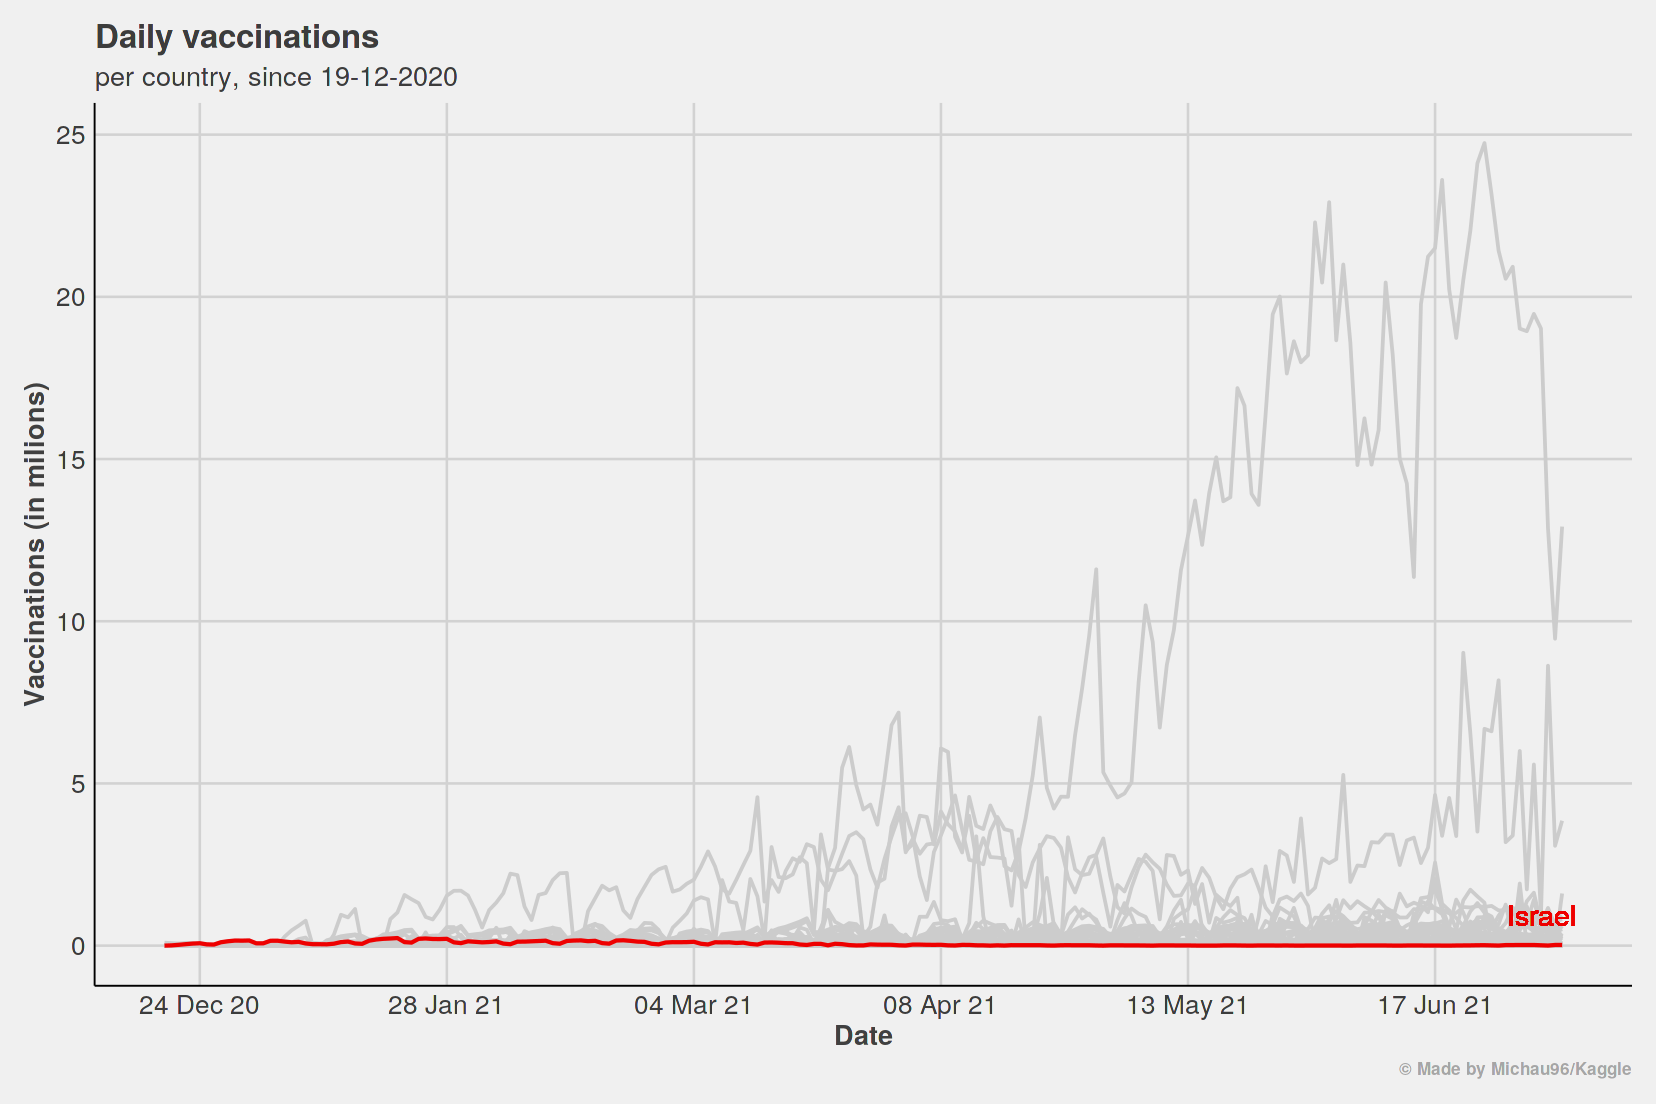

In [3]:
full1 <- data %>%
  group_by(date, country) %>%
  filter(as.Date(date) > "2020-12-18")

isr1 <- data %>%
  group_by(date, country) %>%
  filter(country == "Israel") %>%
  filter(as.Date(date) > "2020-12-18")

full1$daily_vaccinations_raw <- full1$daily_vaccinations_raw/1000000
isr1$daily_vaccinations_raw <- isr1$daily_vaccinations_raw/1000000

ggplot()+
  geom_line(data = full1, aes(date, daily_vaccinations_raw, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = isr1, aes(date, daily_vaccinations_raw), size = 0.9, colour = "red2")+
  geom_text(data = isr1, aes(x = max(isr1$date), y = isr1$daily_vaccinations_raw[isr1$date==max(isr1$date)], 
                              label = country), hjust = 0.8, vjust = -0.9, size = 5.9, color = "red2")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "35 days")+
  labs(x = "Date", y = "Vaccinations (in milions)", title = "Daily vaccinations", subtitle = "per country, since 19-12-2020", 
       caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau

<p style="text-align: justify">We start with the thing that comes to mind first when it comes to vaccinations - the number of vaccinated people per day per country. The leader in this field is the United States, where the number of vaccinated one day has already exceeded 2 million people. In many countries there is an ascending trend, but also large fluctuations (it isn't yet clear whether it's seasonal or accidental). Israel was the leader in single-day vaccinations most of the time until around January 5. After that time, it's overtaken, and as time goes on, more and more countries daily vaccinate more people than this country in the Middle East. Unlike most countries, the trend is by no means increasing - it's more or less constant with fluctuations.</p>

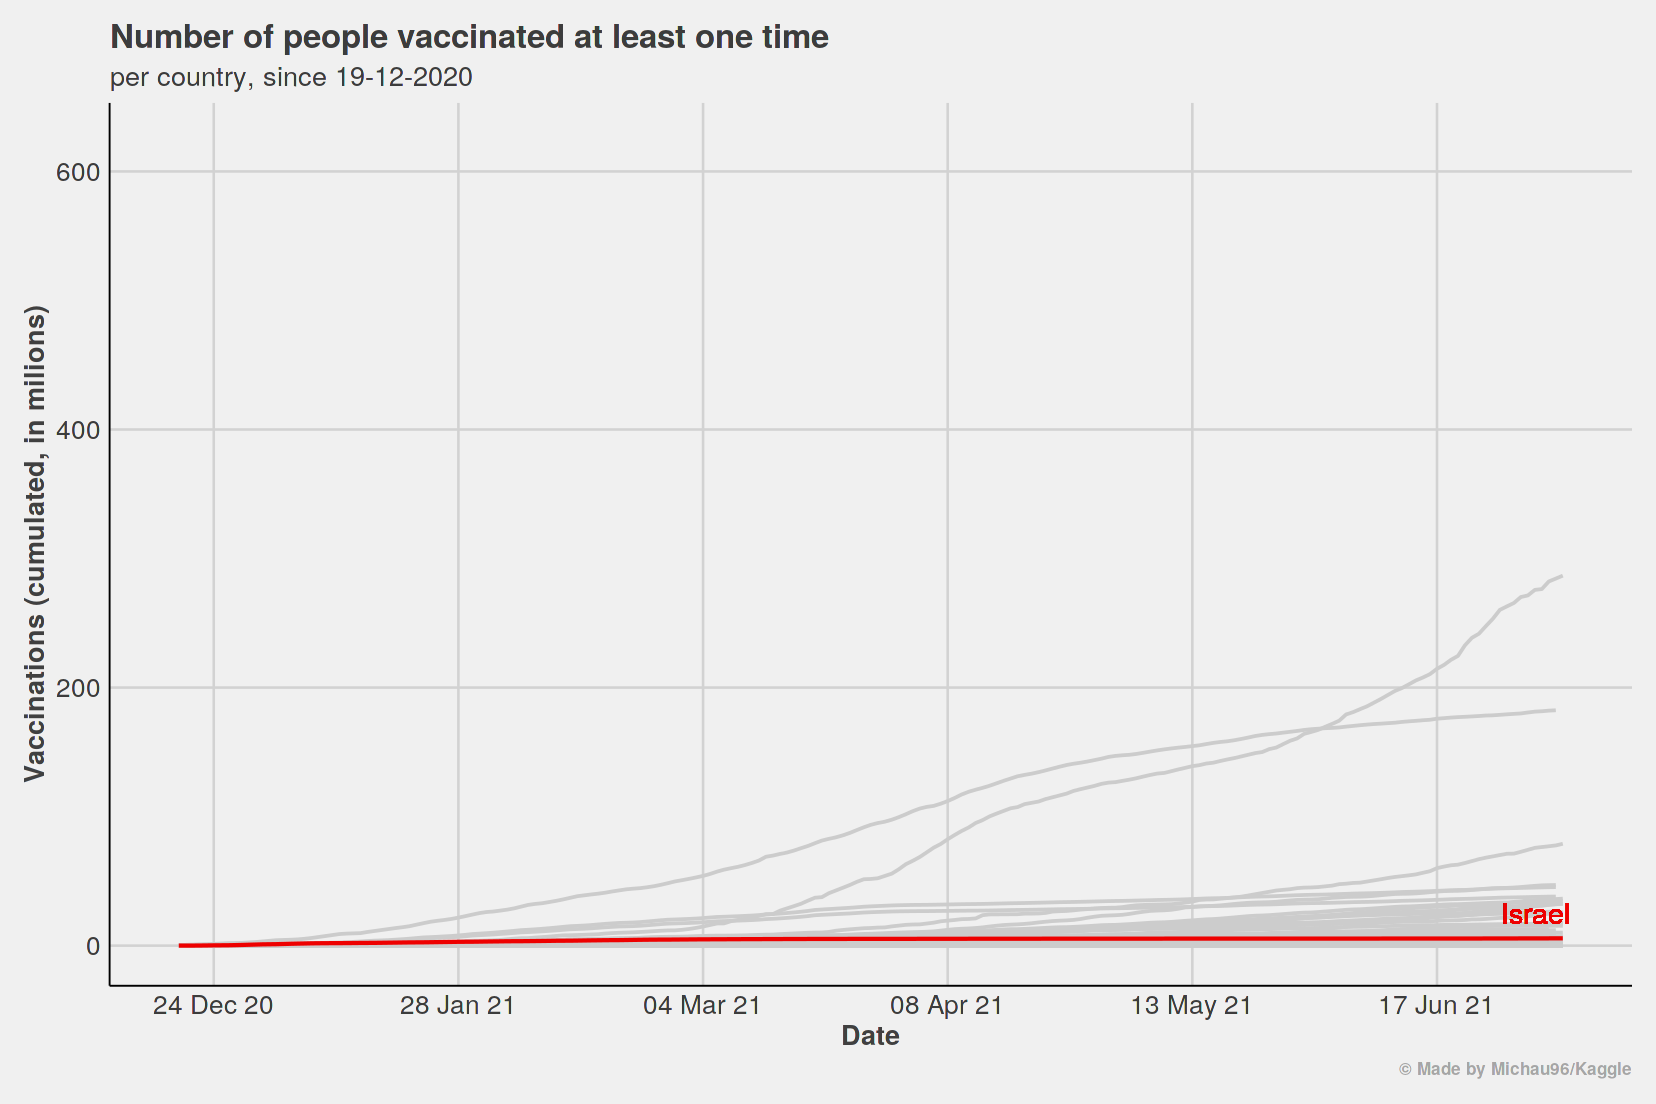

In [4]:
full2 <- data %>%
  group_by(date, country) %>%
  filter(people_vaccinated>0) %>%
  filter(as.Date(date) > "2020-12-18")

isr2 <- data %>%
  group_by(date, country) %>%
  filter(country == "Israel") %>%
  filter(people_vaccinated>0) %>%
  filter(as.Date(date) > "2020-12-18")

full2$people_vaccinated <- full2$people_vaccinated/1000000
isr2$people_vaccinated <- isr2$people_vaccinated/1000000

ggplot()+
  geom_line(data = full2, aes(date, people_vaccinated, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = isr2, aes(date, people_vaccinated), size = 0.9, colour = "red2")+
  geom_text(data = isr2, aes(x = max(isr2$date), y = isr2$people_vaccinated[isr2$date==max(isr2$date)], 
                              label = country), hjust = 0.9, vjust = -0.7, size = 5.9, color = "red2")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "35 days")+
  labs(x = "Date", y = "Vaccinations (cumulated, in milions)", title = "Number of people vaccinated at least one time", 
       subtitle = "per country, since 19-12-2020", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau

<p style="text-align: justify">However, the most important thing about the current situation is the number of days (cumulative) attached to each analyzed day. This means that in the absence of attached people, the value doesn't change, while with each newly vaccinated person the value increases. In mid-January, already two countries had more than 10 million citizens vaccinated, and less than a month later that number already exceeded 30 million per country. We can see that in Israel the increase is quite slow compared to other countries - this is due to the fact that the number of vaccinations daily doesn't increase over time, but is more or less constant.</p>

<p style="text-align: justify">So Israel doesn't currently have the most vaccinated people, nor does it vaccinate the most people a day - so why do we call it a leader? The answer is the percentage of vaccinated inhabitants - the most independent indicator.</p>

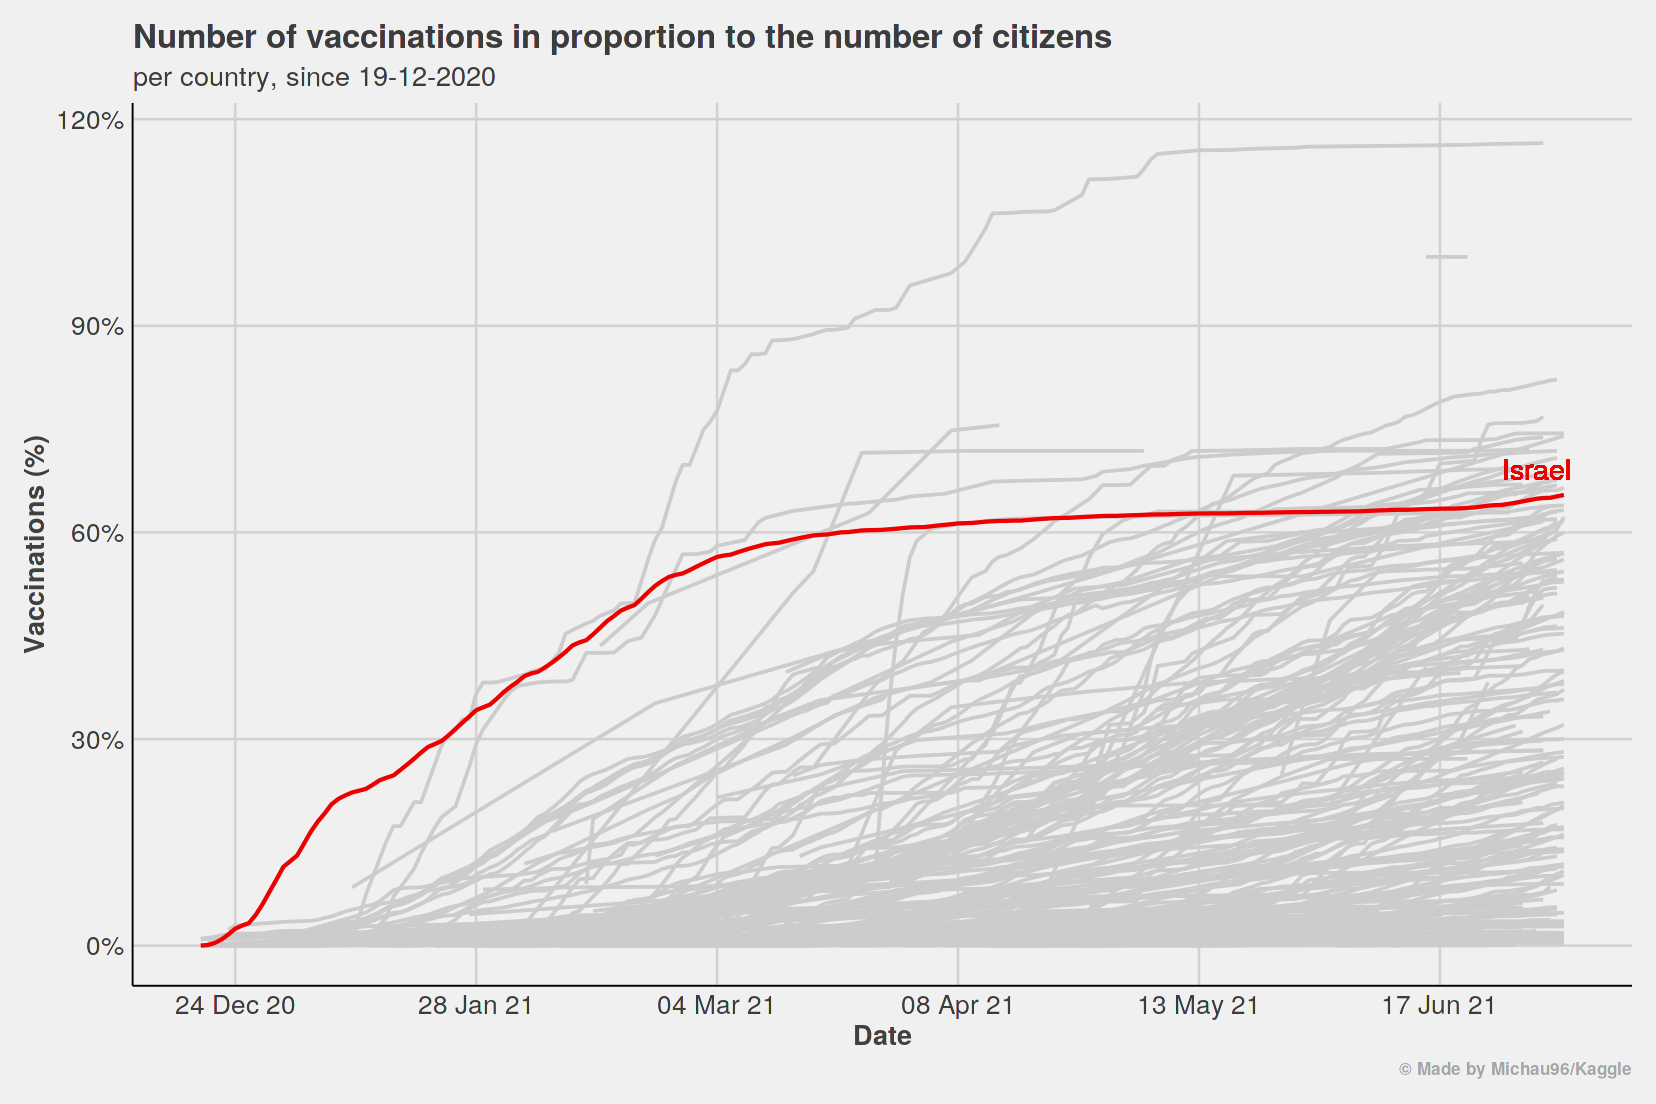

In [5]:
ggplot()+
  geom_line(data = full2, aes(date, percent_people, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = isr2, aes(date, percent_people), size = 0.9, colour = "red2")+
  geom_text(data = isr2, aes(x = max(isr2$date), y = isr2$percent_people[isr2$date==max(isr2$date)], 
                              label = country), hjust = 0.9, vjust = -0.7, size = 5.9, color = "red2")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "35 days")+
  scale_y_continuous(labels = scales::percent_format(accuracy = 1))+
  labs(x = "Date", y = "Vaccinations (%)", 
       title = "Number of vaccinations in proportion to the number of citizens", 
       subtitle = "per country, since 19-12-2020", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau

<p style="text-align: justify">At the beginning of the vaccination process, Israel is by far the leader in terms of the percentage of vaccinated people. It was the first country to vaccinate both 10% and 25% of the population. Currently in February, only small countries are matched by it, where such an operation is relatively easier to organize, but they have not been able to obtain as many vaccines as Israel as quickly. This ratio may exceed 100% as most of the available vaccines are two-dose, i.e. two doses must be taken at a time interval to achieve immunity. </p>

<p style="text-align: justify">So what is the secret of this country? What made him get so many vaccines so quickly, while many countries (even of the same size or similar GDP per capita) have a serious problem to vaccinate at least 10% of the population at the same time? So let's look at the process in a broader perspective, looking for the differences in data between Israel and the rest of the world.</p>

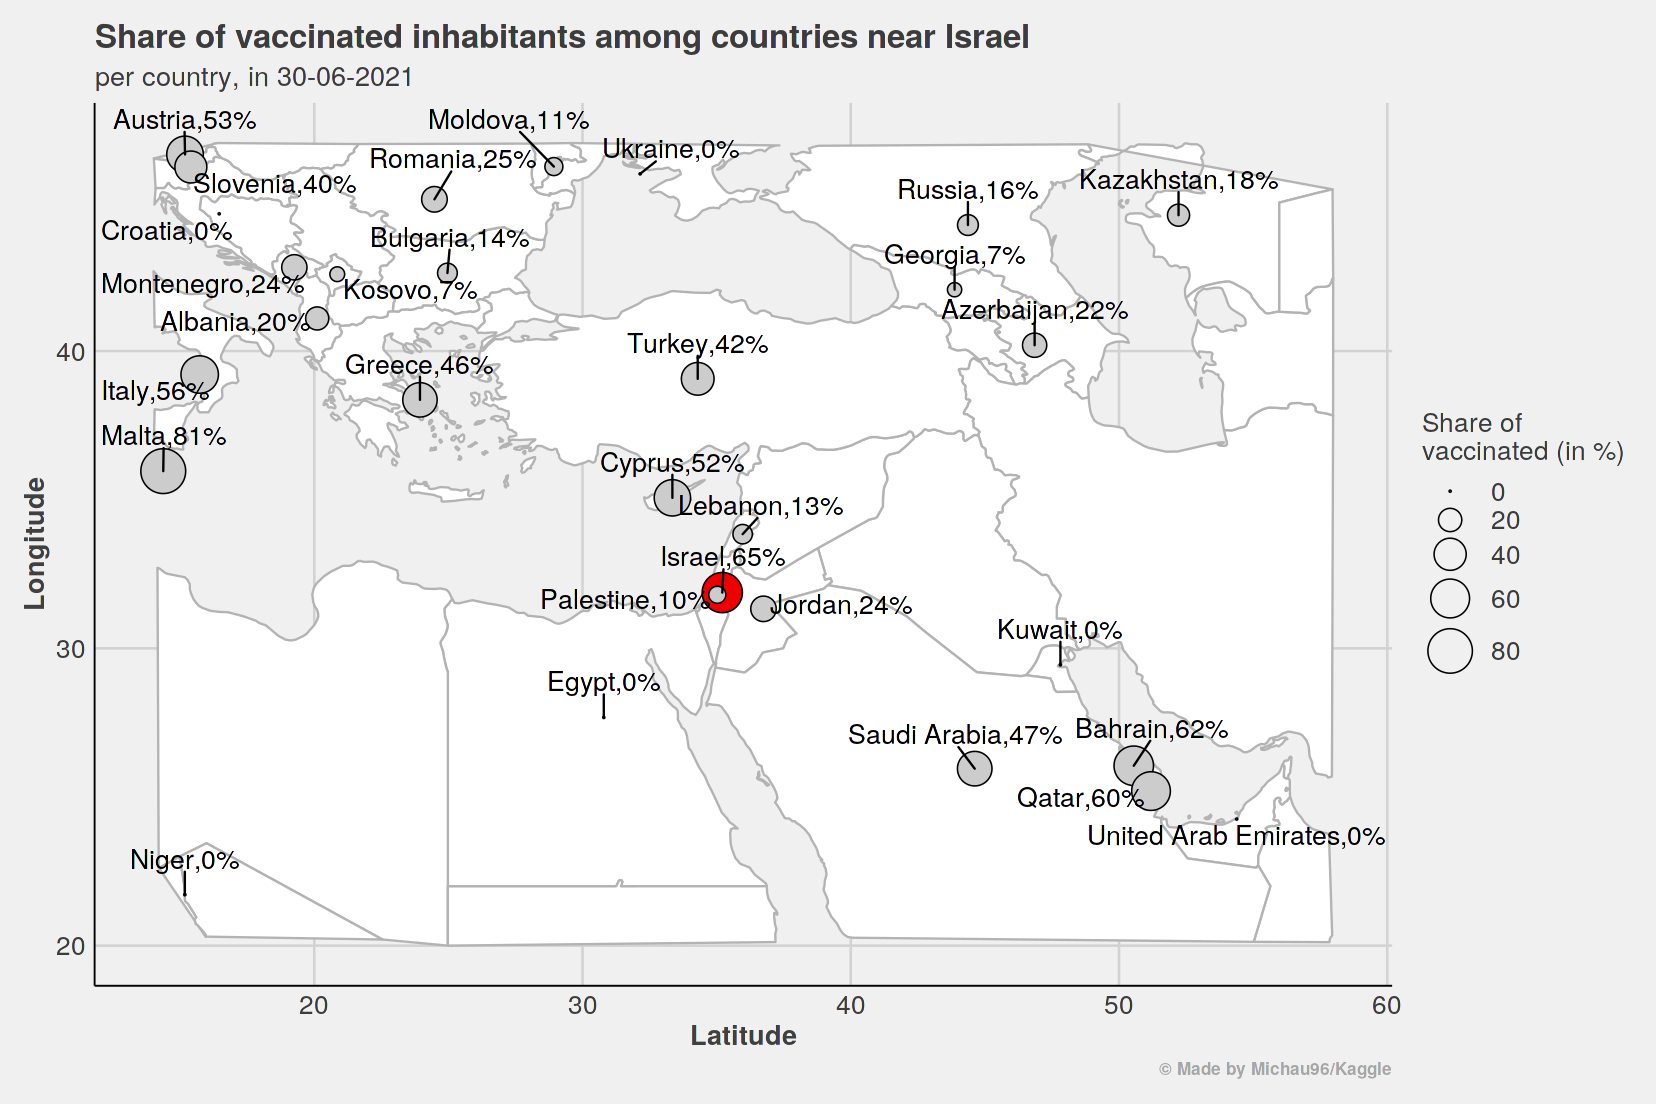

In [6]:
world_map <- map_data("world") %>%
  filter(between(lat, 20, 47)) %>%
  filter(between(long, 14, 58))

country <- data %>%
  filter(date == "2021-06-30")%>%
  group_by(country) %>%
  select(country, people_vaccinated_per_hundred)

names(country)[1] <- "region"

world_map <- world_map %>%
  left_join(country, by = "region")

world_map2 <- world_map %>%
  select(long, lat, region, people_vaccinated_per_hundred) %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat), people_vaccinated_per_hundred = mean(people_vaccinated_per_hundred), 
            .groups = 'drop')

world_map2$israel <- ifelse(world_map2$region=="Israel","red2","gray80")

ggplot()+
  geom_polygon(data = world_map, aes(x = long, y = lat, group = group), fill = "white", colour = "gray70")+
  geom_point(data = world_map2, aes(x = long, y = lat, size = people_vaccinated_per_hundred),
             shape = 21, fill = world_map2$israel)+
  geom_text_repel(data = world_map2[is.na(world_map2$people_vaccinated_per_hundred)==F,],
            aes(x = long, y = lat, label = paste0(region, ",", round(people_vaccinated_per_hundred,0), "%")),
            size = 5.5, hjust = 0.5, vjust = -1.3)+
  scale_size(range = c(0, 12))+
  scale_fill_manual(values = c("red2", "gray80"))+
  labs(x = "Latitude", y = "Longitude", 
       title = "Share of vaccinated inhabitants among countries near Israel",
       size = "Share of\nvaccinated (in %)", subtitle = "per country, in 30-06-2021", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical")

<p style="text-align: justify">We start with the geographical location - we look at the vaccination process in neighboring countries, comparing the most objective measure, which is the number of vaccinated per 100 inhabitants of the country. As we can see, neighboring countries in the Middle East are very far reaching Israel - only Bahrain, which is also a relatively small country, has over 10% of the population vaccinated, but it's almost 4 times less than Israel. Countries geographically close to South East Europe also perform much worse in the proportion of vaccinated people. The best in the European group shown in the chart is Serbia. Therefore, we can observe on these examples that vaccination is also carried out more efficiently in other small territorially countries. It's worth adding that for some countries these data are not updated (eg Single Arab Emirates), while we only have information about the number of vaccinations.</p>

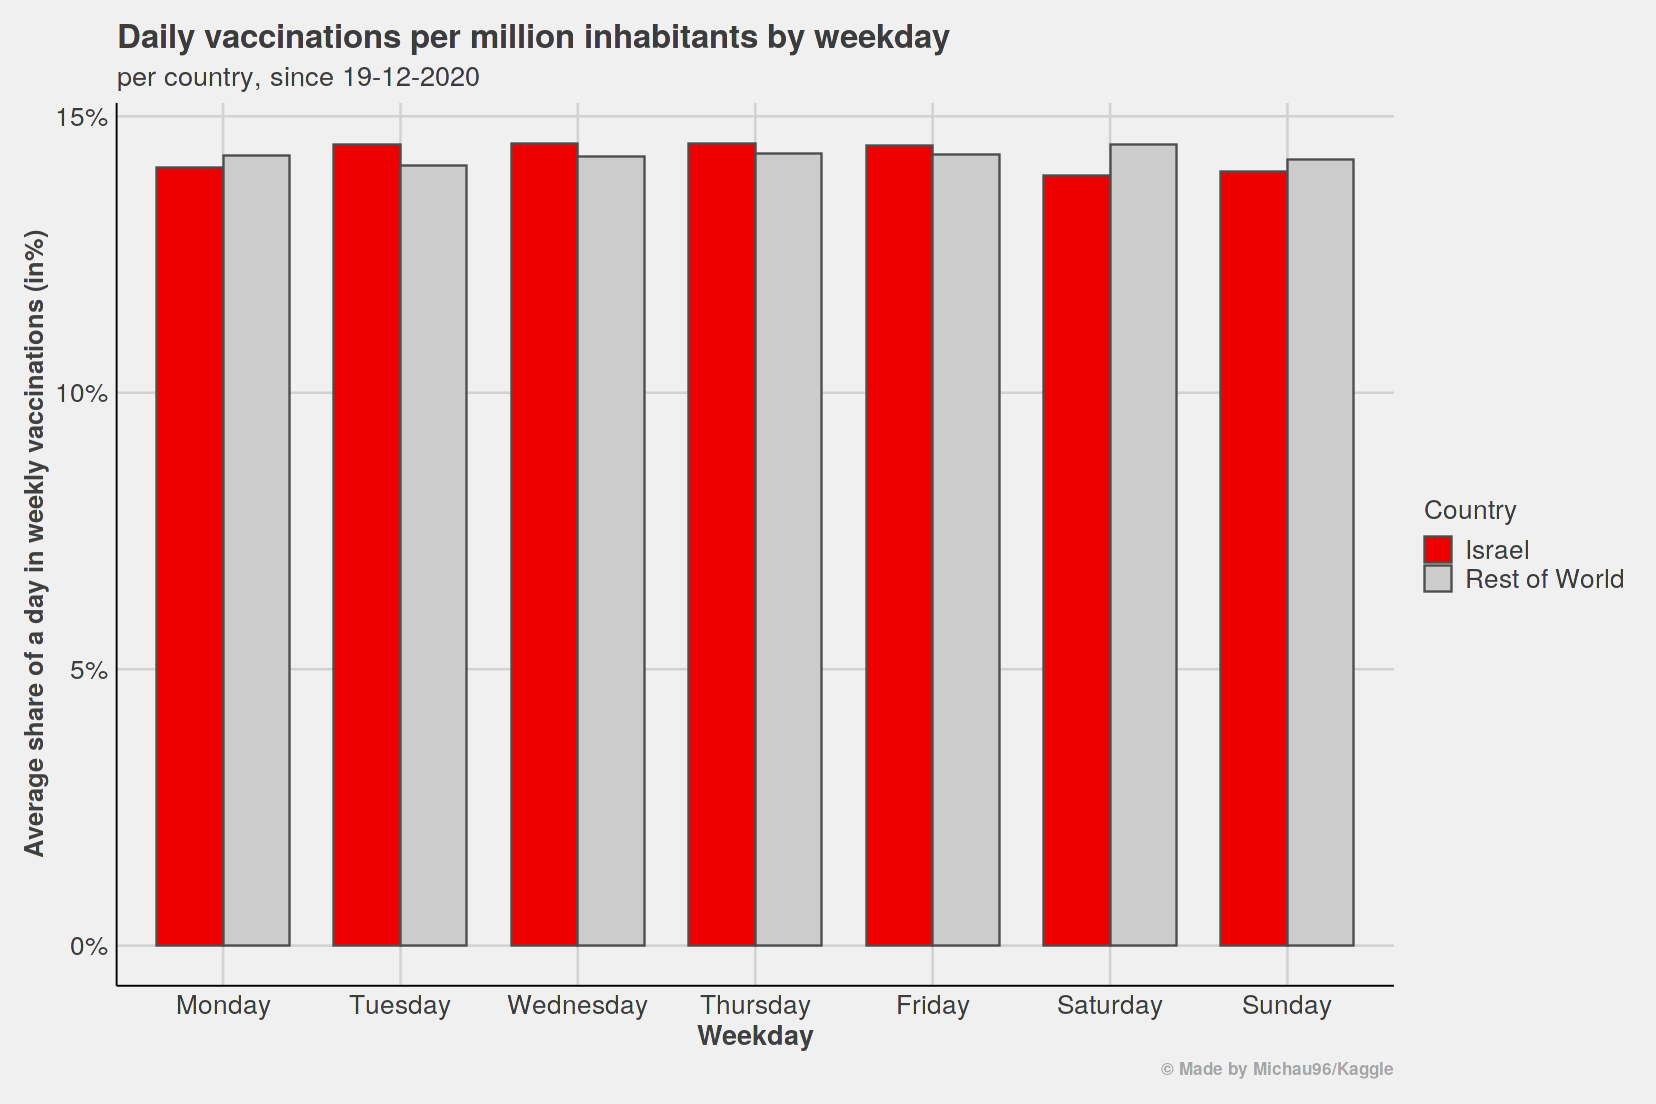

In [7]:
full3 <- data %>%
  filter(as.Date(date) > "2020-12-18") %>%
  select(weekday, country, daily_vaccinations_per_million) %>%
  group_by(weekday, country) %>%
  summarise(sr = mean(daily_vaccinations_per_million), .groups = 'drop')

full3$isreal <- ifelse(full3$country=="Israel","Israel", "Rest of World")

full3isr <- full3 %>%
  filter(isreal=="Israel")

full3row <- full3 %>%
  filter(isreal=="Rest of World")

full3row <- full3row %>%
  group_by(weekday) %>%
  summarise(sr = mean(sr), .groups = 'drop')

full3row$country <- "Rest of World"
full3isr <- full3isr[,1:3]
full3row <- full3row[,c(1,3,2)]

full3isr <- as.data.frame(full3isr)
full3isr$sr <- full3isr$sr/sum(full3isr$sr)

full3row <- as.data.frame(full3row)
full3row$sr <- full3row$sr/sum(full3row$sr)

full3 <- rbind(full3isr, full3row)

ggplot(full3, aes(weekday, sr, fill = country))+
  geom_bar(stat = "identity",  width = 0.75, position=position_dodge(), col = "gray30")+
  scale_x_discrete(limit = c("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))+
  scale_fill_manual(values = c("red2","gray80"))+
  scale_y_continuous(labels = scales::percent_format(accuracy = 1))+
  labs(x = "Weekday", y = "Average share of a day in weekly vaccinations (in%)", 
       title = "Daily vaccinations per million inhabitants by weekday",
       fill = "Country", subtitle = "per country, since 19-12-2020", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical", axis.title.y = element_text(size = 15))

<p style="text-align: justify">Another idea that might make vaccinations different is spreading them over the course of the week. Perhaps the differences may be due to stopping the vaccination on weekends or a different strategy. We can see that both in Israel and in the rest of the world there are no big differences in vaccination schedules by day of the week. Comparing the averages, we can see that the fewest people in Israel are vaccinated on Saturdays, and in other countries on Sundays. The differences are so small between the two analyzed groups that we can undoubtedly say that the weekly schedule is not the reason for the success of this Middle East country.</p>

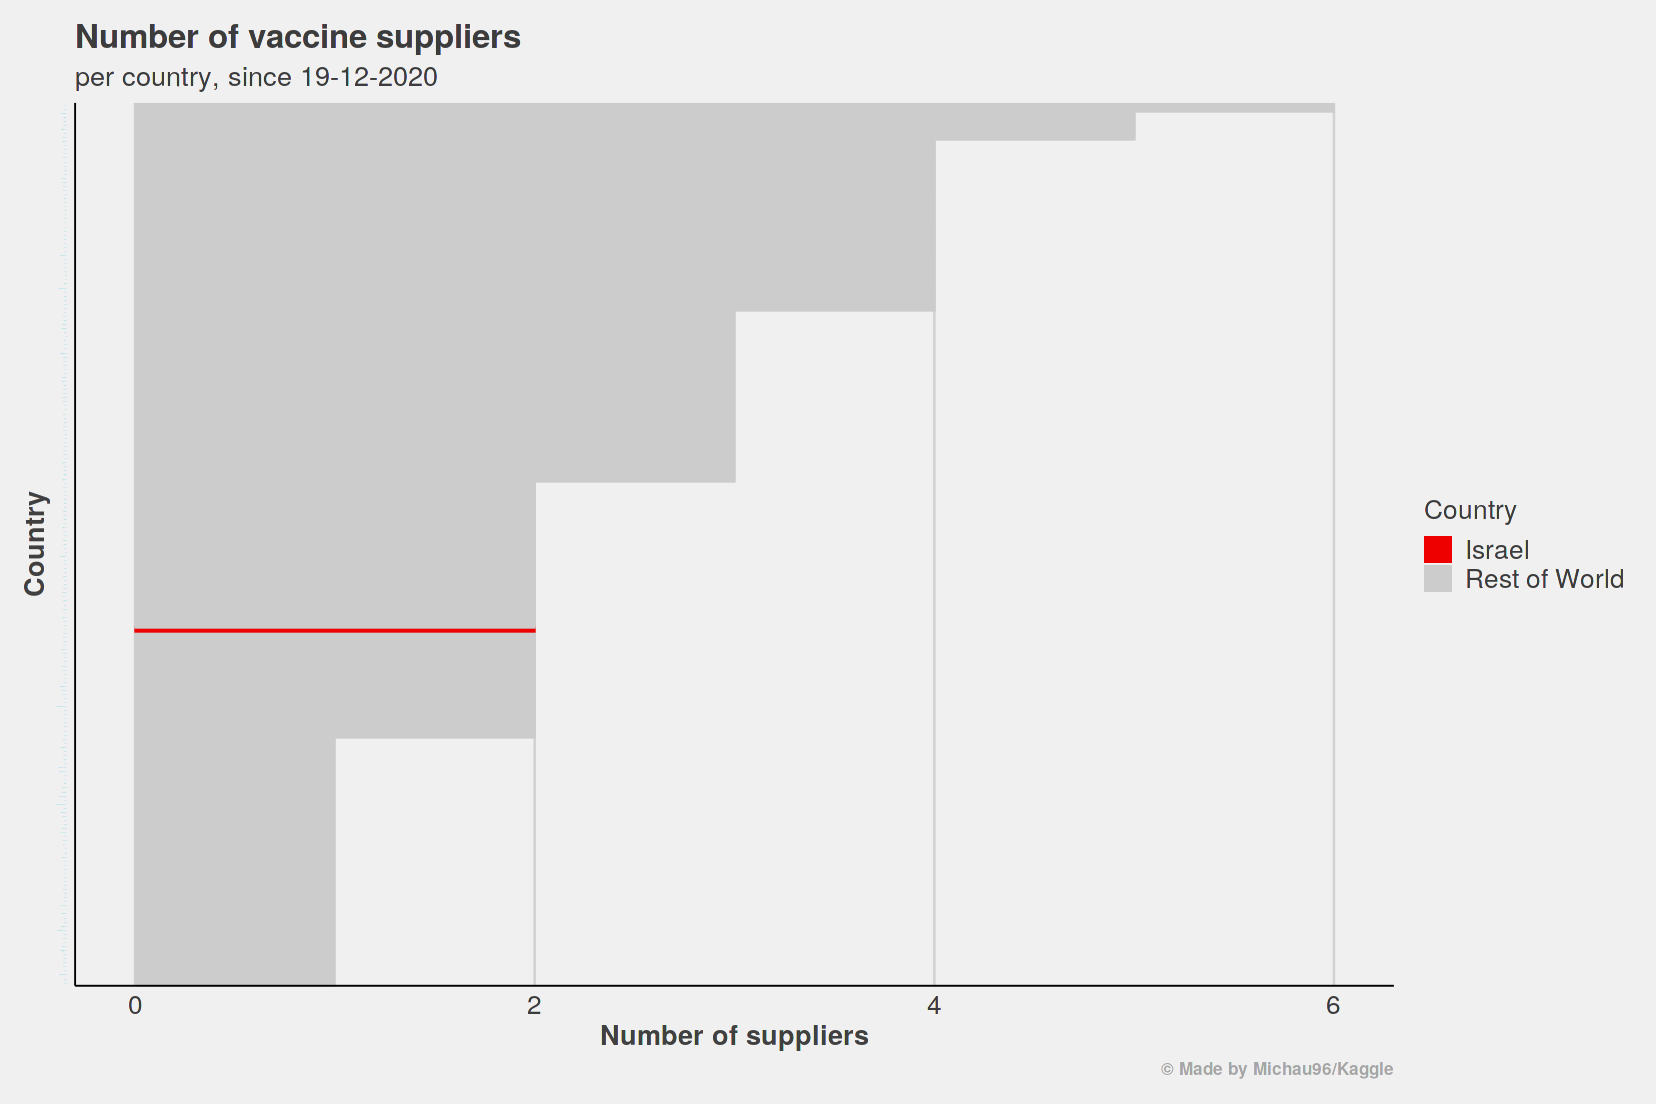

In [8]:
data$number_of_vac <- str_count(data$vaccines, ",")+1

vacx <- data %>%
  filter(as.Date(date) > "2020-12-18") %>%
  group_by(country, number_of_vac) %>%
  summarise(avg = mean(number_of_vac), .groups = 'drop') %>%
  filter(avg>0)

vacx$israel <- ifelse(vacx$country=="Israel", "Israel", "Rest of World")

ggplot(vacx, aes(reorder(country, +avg), avg, fill = israel, colour = israel))+
  geom_bar(stat = "identity",  width = 0.9)+
  scale_fill_manual(values = c("red2", "gray80"))+
  scale_colour_manual(values = c("red2", "gray80"), guide = F)+
  coord_flip()+
  labs(y = "Number of suppliers", x = "Country", title = "Number of vaccine suppliers", fill = "Country", 
       subtitle = "per country, since 19-12-2020", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical", axis.text.y = element_text(size = 0),
        panel.grid.major.y = element_blank())

<p style="text-align: justify">As we recalled at the beginning, not one, but several vaccines have been approved for use (and their number may increase). So let's take a look at Israel's performance in terms of the number of different vaccine suppliers compared to other countries. The record holder here is the United Arab Emirates, where as many as 6 different vaccines are used. Some European countries already use the services of 3 different suppliers, while some of them only 2. Similarly, Israel, which currently uses vaccines produced by "Moderna" and "Pfizer / BioNTech" companies. The analyzed country is in the middle of the rate and in the vicinity of the average (many countries still use only one supplier), so this is certainly not an aspect that distinguishes this country.</p>

<p style="text-align: justify">The vaccination process in Israel doesn't seem to be crucial for their rapid pace compared to other countries. The decisive factor was the rapid start of mass vaccination, while other countries were just thinking about organizing the process. But why was it possible to organize it so quickly in Israel? Perhaps a quick purchase of vaccines, perhaps public pressure after the epidemic escalated in autumn and the lockdown was introduced? However, we'll look for answers in other data, looking more broadly for the economic and social aspects in which Israel stands out from other countries. For this we will use data from the "World Factbook" describing the various country-specific variables.</p>

In [9]:
other <- read.csv("../input/countries-of-the-world/countries of the world.csv", stringsAsFactors = F)
other <- other[,c("Country", "Population", "Area..sq..mi..", "Pop..Density..per.sq..mi..", "GDP....per.capita.", 
                  "Phones..per.1000.", "Literacy....", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service")]

names(other) <- c("region", "Population", "Area", "PopDensity", "GDP", "Phones", "Literacy", "Birthrate", 
                  "Deathrate", "Agriculture", "Industry", "Service")

other$region <- gsub(" ", "", other$region)
other$PopDensity <- as.numeric(gsub(",", ".", other$PopDensity))
other$Phones <- as.numeric(gsub(",", ".", other$Phones))
other$Literacy <- as.numeric(gsub(",", ".", other$Literacy))
other$Birthrate	<- as.numeric(gsub(",", ".", other$Birthrate))
other$Deathrate	<- as.numeric(gsub(",", ".", other$Deathrate))
other$Agriculture <- as.numeric(gsub(",", ".", other$Agriculture))
other$Industry <- as.numeric(gsub(",", ".", other$Industry))
other$Service <- as.numeric(gsub(",", ".", other$Service))


country <- as.data.frame(country)
country$region <- as.character(country$region)

#other <- other %>%
#  left_join(country, by = "region")

other <- merge(other, country, by = "region", all.x = T, )
names(other)[13] <- "Vaccinate_Percentage"

head2 <- other[sample(1:nrow(other),5), ]
head2

,region,Population,Area,PopDensity,GDP,Phones,Literacy,Birthrate,Deathrate,Agriculture,Industry,Service,Vaccinate_Percentage
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
108,Kenya,34707817,582650,59.6,1000,8.1,85.1,39.72,14.02,0.163,0.188,0.651,1.87
194,Suriname,439117,163270,2.7,4000,184.7,93.0,18.02,7.27,0.130,0.220,0.650,27.32
138,Moldova,4466706,33843,132.0,1800,208.1,99.1,15.70,12.64,0.213,0.233,0.555,11.23
184,Singapore,4492150,693,6482.2,23700,411.4,92.5,9.34,4.28,0.000,0.339,0.661,0.00
145,Namibia,2044147,825418,2.5,7200,62.6,84.0,24.32,18.86,0.097,0.315,0.588,4.77


<p style="text-align: justify">The data isn't the latest and comes from 2017 or earlier years, but it should be enough to find the current dependencies. We have selected several variables that may have a substantive impact on the current situation - from demographic variables to access to information.</p>

<p style="text-align: justify">We start by looking at the correlations between the variables in the newly loaded database. All the variables are on a continuous scale, so we'll use the Spearman's rank correlation coefficient. We will not use the standard Pearson's linear correlation coefficient as it only determines the strength of linear relationships, and we aren't limited to any kind of relationship. We're primarily interested in the relationships with the participation of vaccinated people in society, thus looking for variables whose similar value level coexists with the analyzed variable in other countries.</p>

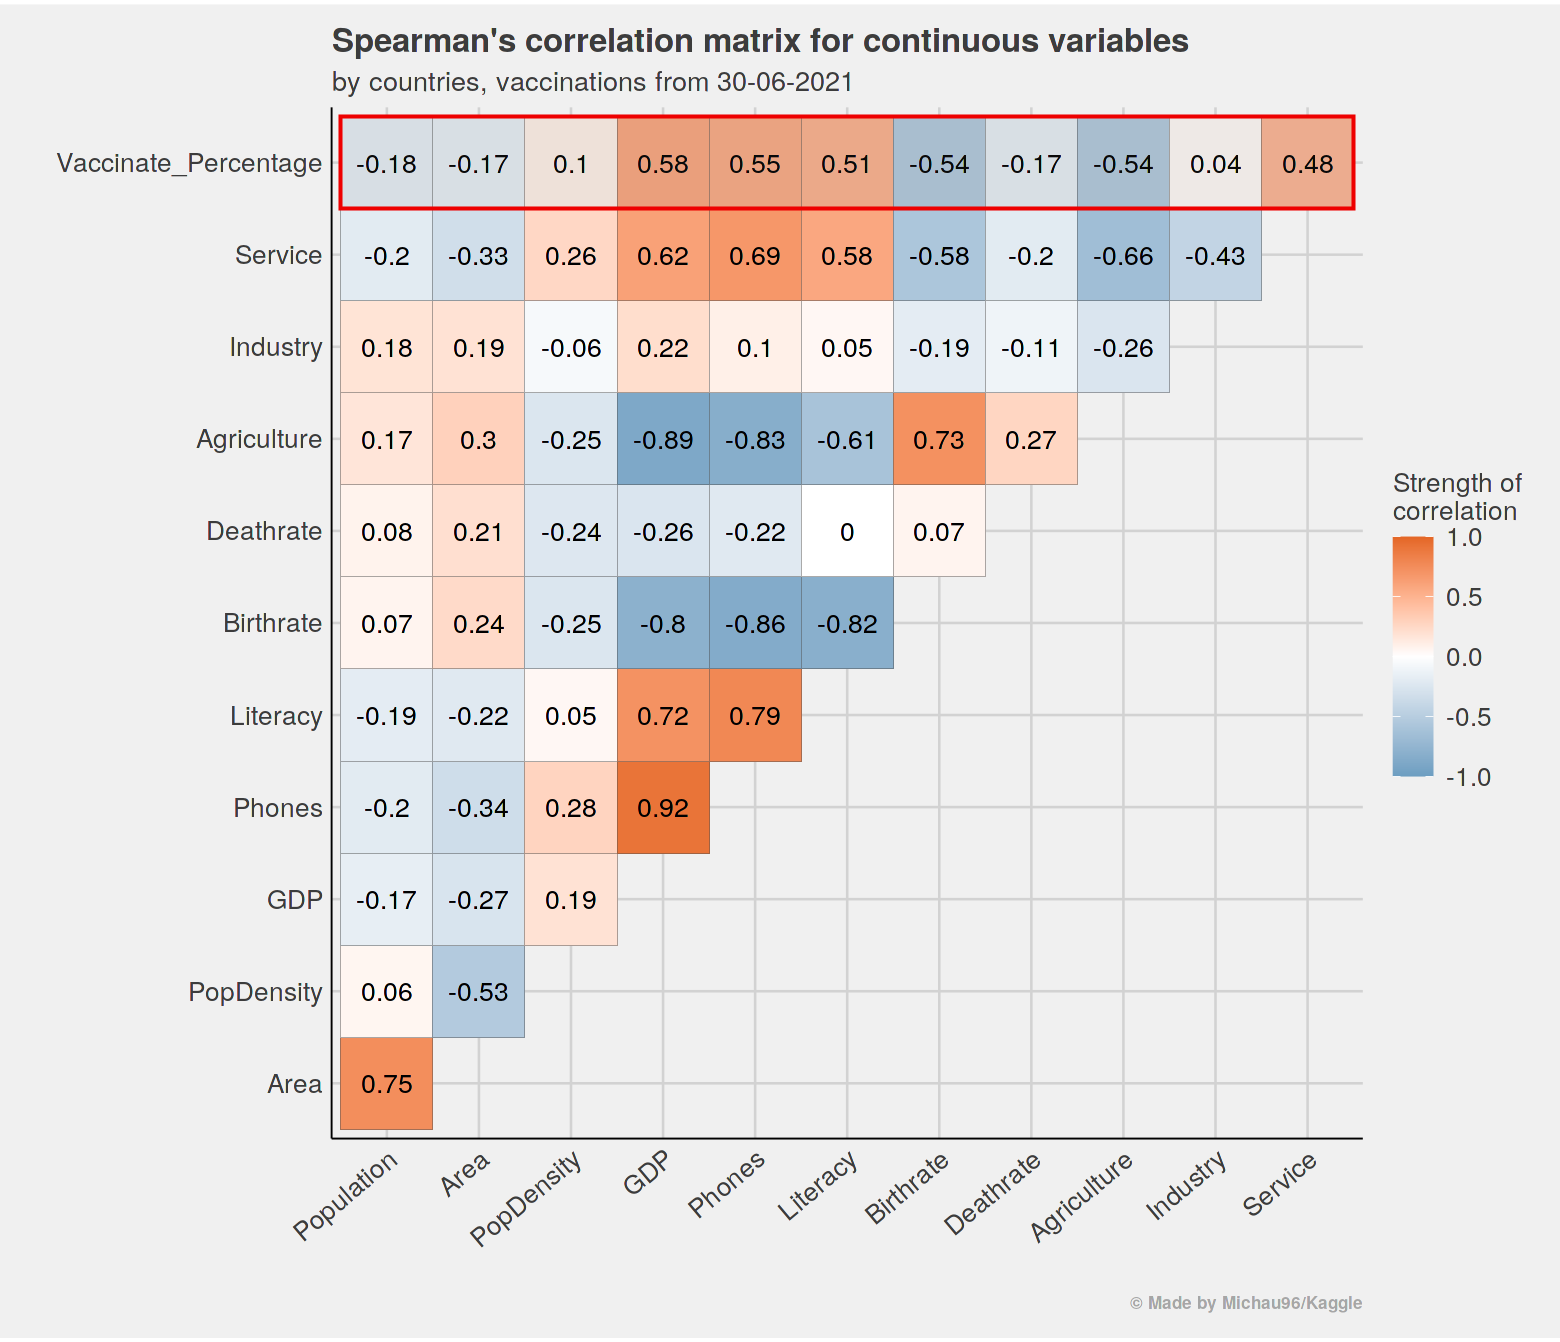

In [10]:
core <- cor(other[,c(2:ncol(other))], method = "spearman", use = "complete.obs")

options(repr.plot.width = 13, repr.plot.height = 11.18)

ggcorrplot(core, outline.col = "gray30", type = "upper", lab = T, lab_size = 5.5,
           legend.title = "Strength of \ncorrelation", colors = c("#6D9EC1", "white", "#E46726"))+
  labs(y = "", x = "", title = "Spearman's correlation matrix for continuous variables",
       subtitle = "by countries, vaccinations from 30-06-2021", caption = "© Made by Michau96/Kaggle")+
  annotate("rect", xmin = 0.5, xmax = 11.5, ymin = 10.5, ymax = 11.5, alpha = 0.1, color = "red2", size = 0.85)+
  guides(fill = guide_colorbar(title.position = "top", barheight = 10, barwidth = 1.7))+
  theme_fivethirtyeight()+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical", axis.text.x = element_text(angle = 40, hjust = 1))

<p style="text-align: justify">The share of vaccinated people in a country is not strongly correlated with any other variable we have in the second base. The strongest negative correlations, which are only around -0.5, are the size of the birthrate and the share of agriculture in the economy. This means that the increase in the value of these variables more often coincides with low values of the percentage of vaccinated persons in the society. Moderate positive correlations can be seen with the following variables: GDP per capita, number of phones per 1000 inhabitants, share of literacy and share of people working in service sectors. The lack of strong correlations also makes it difficult to find in this information any significant reasons for the rapid progress of coronavirus vaccination in some countries (including Israel).</p>

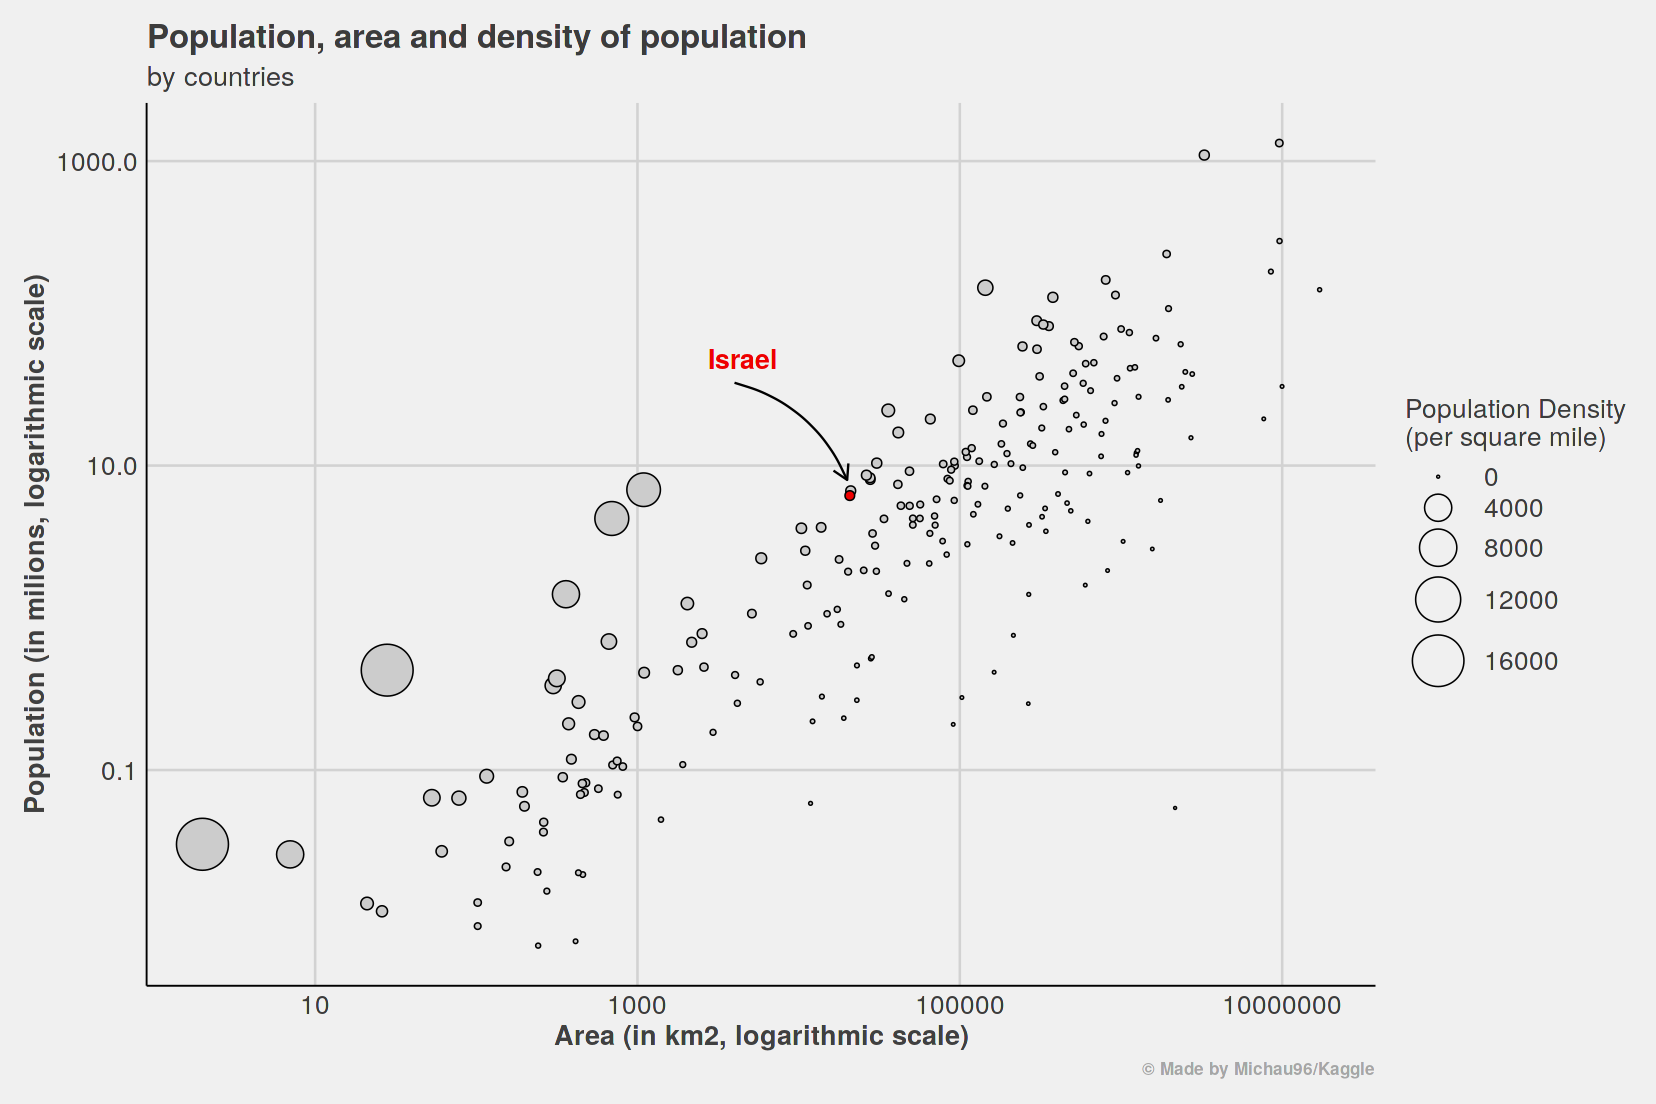

In [11]:
other$israel <- ifelse(other$region=="Israel","Israel", "Rest of World")

options(repr.plot.width = 13.8, repr.plot.height = 9.2)

ggplot(other, aes(Area, Population/1000000, fill = israel, size = PopDensity))+
  geom_point(shape = 21)+
  scale_fill_manual(values = c("red2", "gray80"), guide = F)+
  scale_size(range = c(0.2, 14))+
  scale_y_log10()+
  scale_x_log10()+
  annotate(geom = "curve", xend = 20000, y = 35, x = 4000, yend = 8.05, curvature = -0.25, arrow = arrow(length = unit(3.5, "mm")))+
  annotate("text", x = 4500, y = 50, label = "Israel", size = 5.5, colour = "red2", fontface = 2)+
  labs(y = "Population (in milions, logarithmic scale)", x = "Area (in km2, logarithmic scale)", title = "Population, area and density of population", fill = "Country",
       subtitle = "by countries", size = "Population Density\n(per square mile)", caption = "© Made by Michau96/Kaggle")+
 # guides(fill = guide_legend(override.aes = list(size = 4)))+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical")

<p style="text-align: justify">We come to the position of Israel among other countries according to the given variables. We're looking for a system where Israel can stand out from other countries, just as it excels in vaccination. We start with the country area (on the X axis), population (on the Y axis), and a combination of these two variables, i.e. population density (expressed as point size). Logarithmic scales have been used for the distribution of the variables on the further axis to improve readability and better show the differences between countries. In all three characteristics, Israel is in the middle of the middle without any distinction. Therefore, this country doesn't significantly influence the negative correlations of vaccines with these variables and isn't a decisive factor for such a large percentage of the vaccinated society. We keep looking!</p>

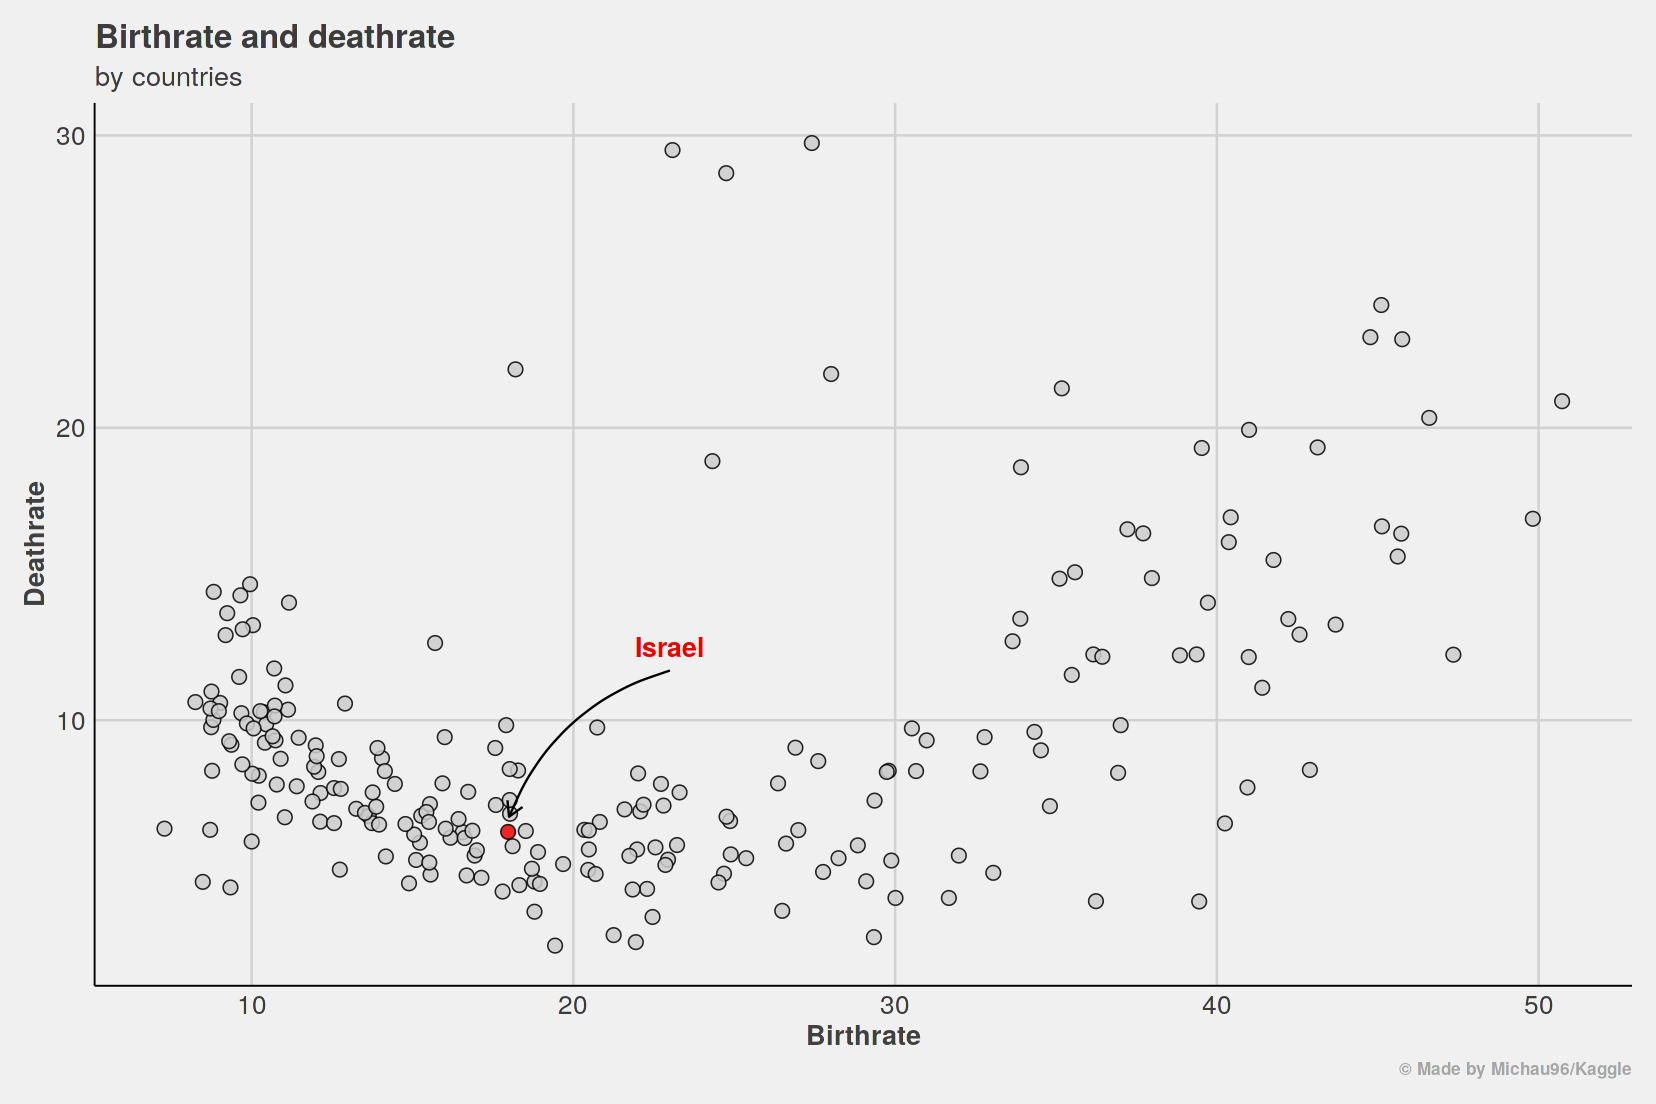

In [12]:
ggplot(other, aes(Birthrate, Deathrate, fill = israel))+
  geom_point(shape = 21, size = 3.5, alpha = 0.85)+
  scale_fill_manual(values = c("red2", "gray80"), guide = F)+
  annotate(geom = "curve", xend = 18, y = 11.7, x = 23, yend = 6.7, curvature = 0.25, arrow = arrow(length = unit(3.5, "mm")))+
  annotate("text", x = 23, y = 12.5, label = "Israel", size = 5.5, colour = "red2", fontface = 2)+
  labs(y = "Deathrate", x = "Birthrate", title = "Birthrate and deathrate", fill = "Country",
       subtitle = "by countries", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical")

<p style="text-align: justify">Moving on, we look at the demographic variables: deathrate and birthrate, that is, respectively, the number of deaths and the number of births per 10,000 inhabitants per year. When the birthrate value is lower than the deathrate value in that country, the population (not including migration) decreases. Israel is a country with a low number of deaths in relation to the population and a moderate number of births (the number of inhabitants increases every year). It doesn't stand out from other countries, although the demographic situation in this country is much better than in many wealthier countries. Worry for families that are on average larger than, for example, in Europe? This doesn't seem to be a significant reason - in other countries with similar demographics and numbers the number of vaccinated people is low.</p>

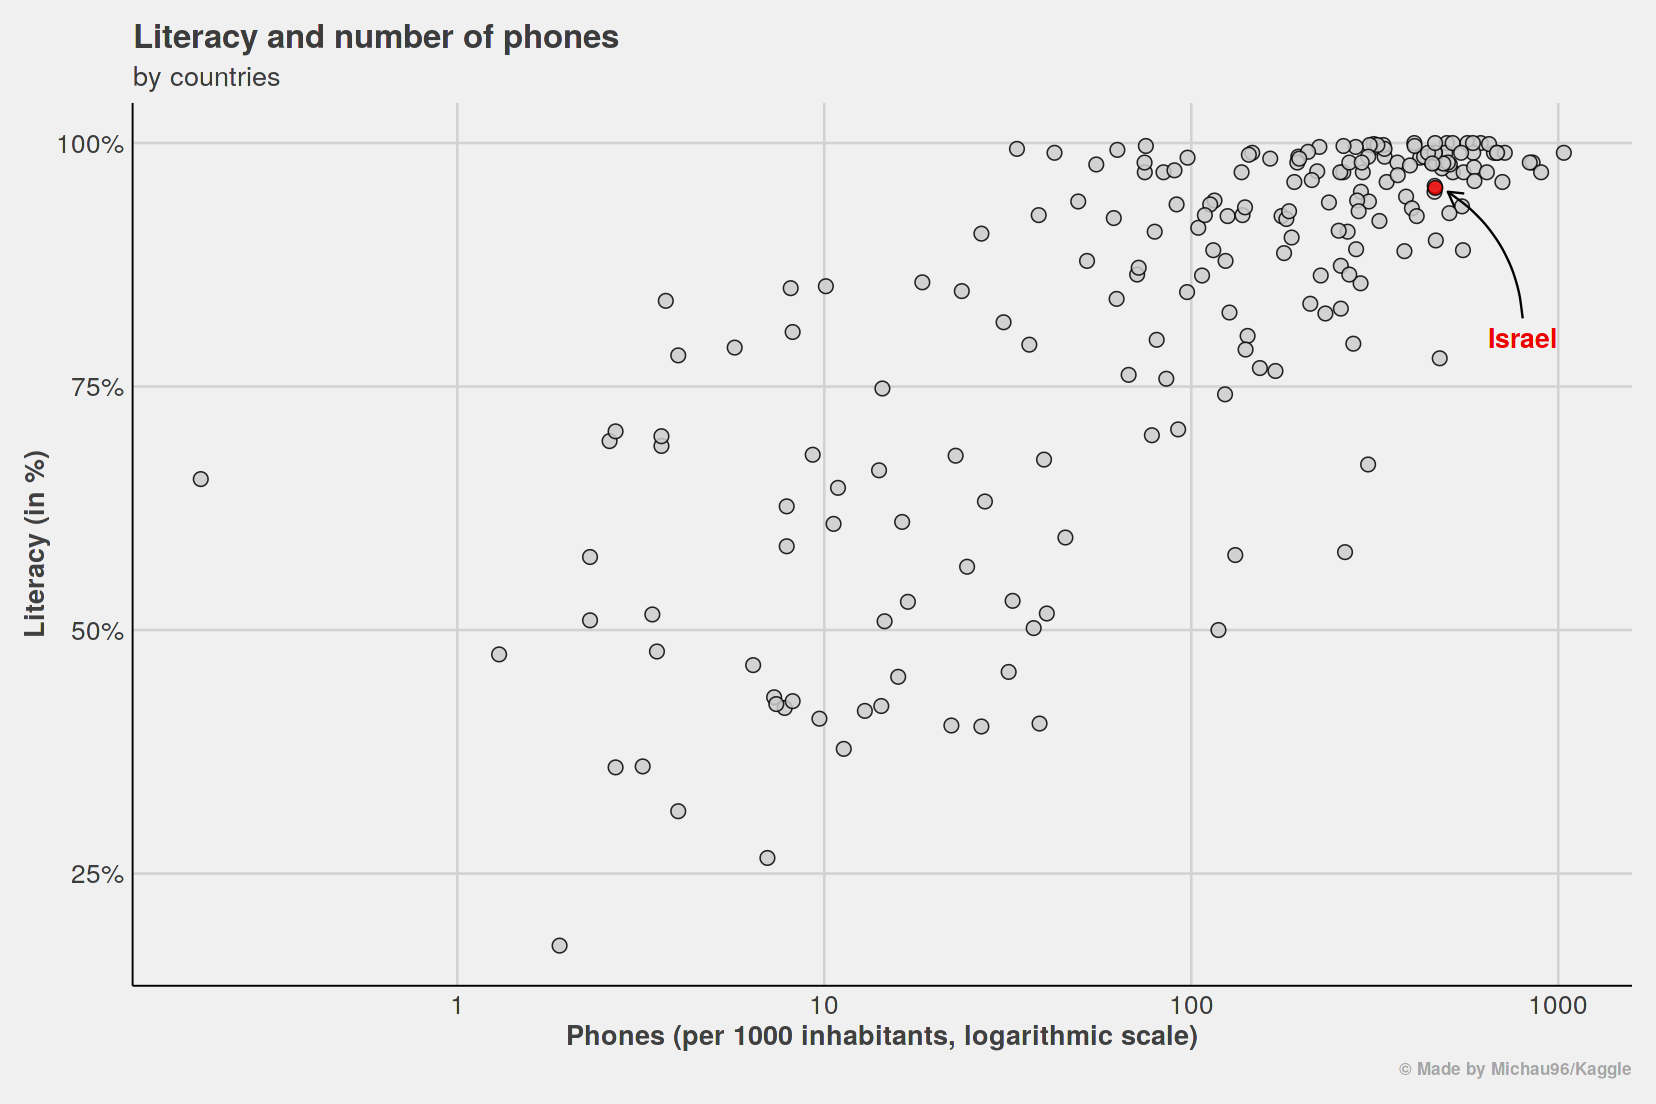

In [13]:
ggplot(other, aes(Phones, Literacy/100, fill = israel))+
  geom_point(shape = 21, size = 3.5, alpha = 0.85)+
  scale_fill_manual(values = c("red2", "gray80"), guide = F)+
  scale_x_log10()+
  scale_y_continuous(labels = scales::percent_format(accuracy = 1))+
  annotate(geom = "curve", xend = 500, y = 0.82, x = 800, yend = 0.95, curvature = 0.25, arrow = arrow(length = unit(3.5, "mm")))+
  annotate("text", x = 800, y = 0.8, label = "Israel", size = 5.5, colour = "red2", fontface = 2)+
  labs(y = "Literacy (in %)", x = "Phones (per 1000 inhabitants, logarithmic scale)", title = "Literacy and number of phones",
       fill = "Country", subtitle = "by countries", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical")

<p style="text-align: justify">If vaccination isn't affected by geographic and demographic variables, access to information may have an impact. Better information flow in society means more people will get vaccinated, more people will get truthful information about vaccines and will be more likely to get vaccinated. In the database, we have two pieces of information related to this topic: the rate of the society that can write and read and the number of phone calls per 1,000 inhabitants. Most countries have over 90% of the population that can read and communicate information other than by speech and access telephones over 500 devices per 1,000 inhabitants. This group also includes Israel, where the number of telephones is particularly high. However, this doesn't distinguish this country, because in today's world such values are present in many countries on all continents, so access to information is equally easy in many countries, which have not yet embraced even 5% of the society. Again, a missed "shot", but we don't give up and keep on drilling!</p>

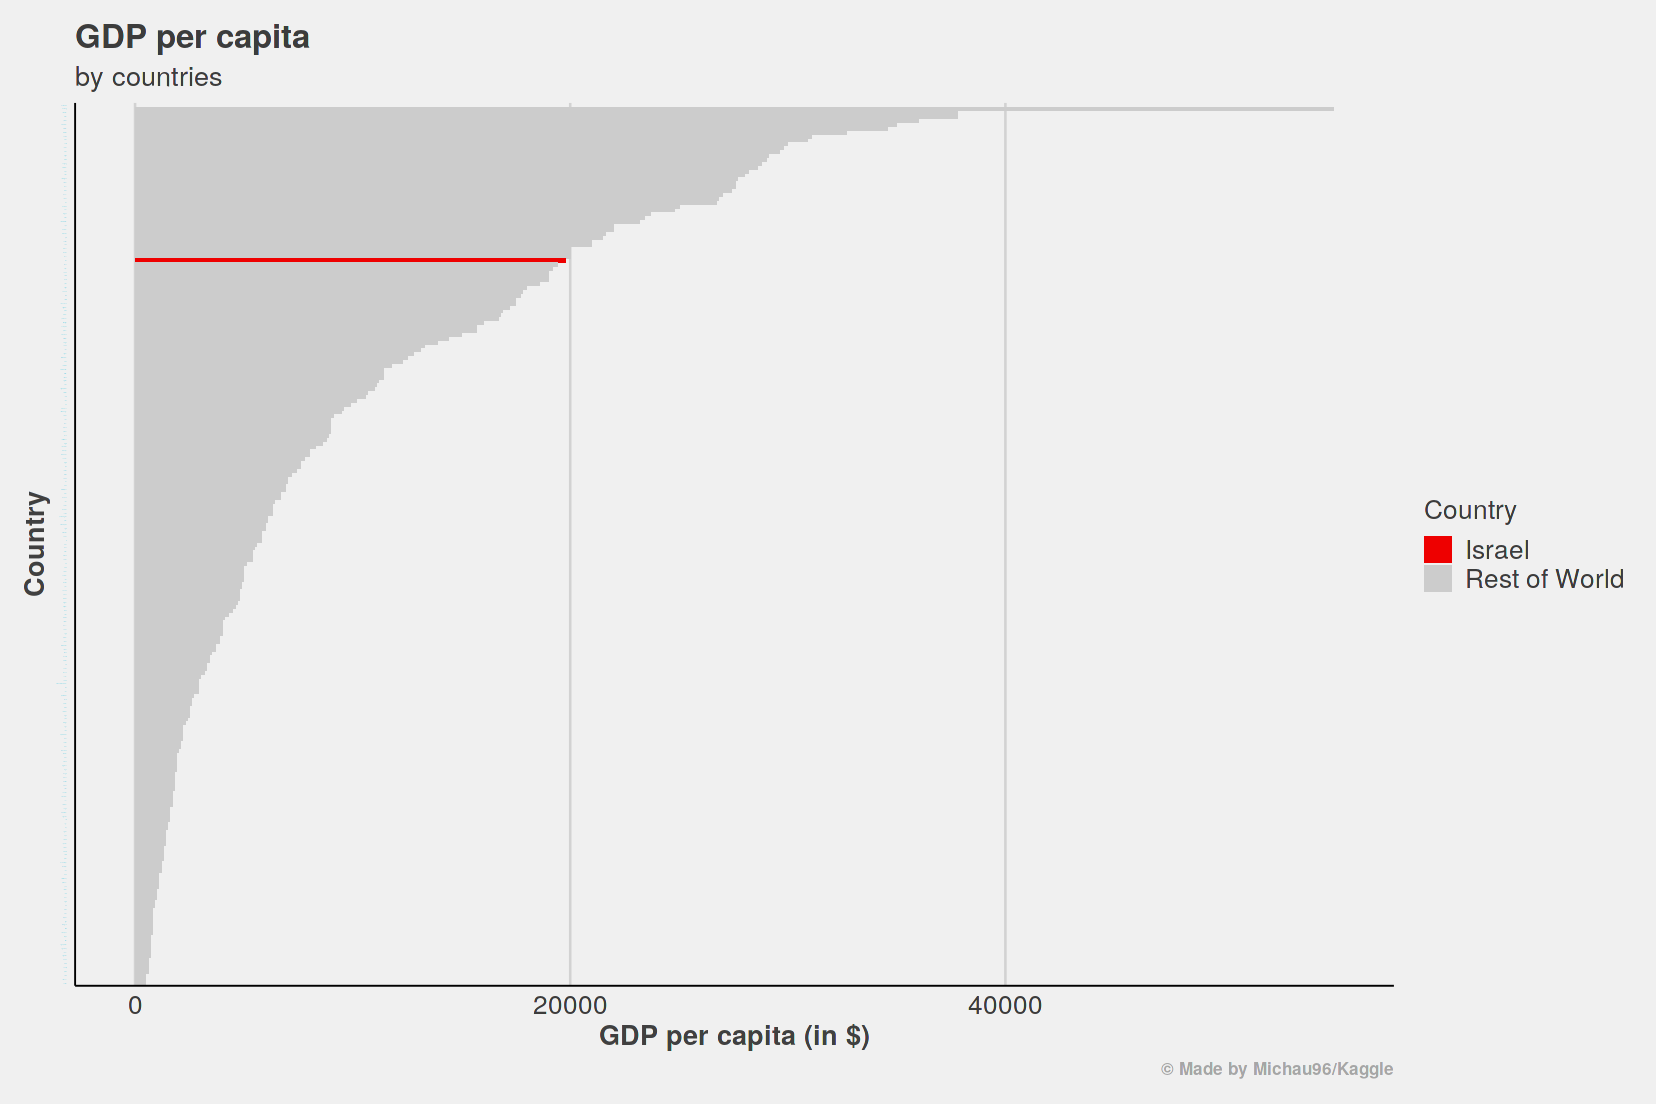

In [14]:
ggplot(other, aes(reorder(region, + GDP), GDP, fill = israel, size = israel))+
  geom_bar(stat = "identity", width = 0.9)+
  scale_fill_manual(values = c("red2", "gray80"))+
  scale_colour_manual(values = c("red2", "gray80"))+
  scale_size_manual(values = c(7,2), guide = F)+
  coord_flip()+
  labs(y = "GDP per capita (in $)", x = "Country", title = "GDP per capita", fill = "Country",
       subtitle = "by countries", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical", axis.text.y = element_text(size = 0),
        panel.grid.major.y = element_blank())

<p style="text-align: justify">We now look at the most popular economic indicator which is Gross Domestic Product per capita in US dollars. The value of this ratio for Israel is almost 20,000, which is above the average and median for over 200 analyzed countries. This country doesn't stand out from the rest, but it cannot be denied that richer countries find it easier to negotiate the purchase of vaccines - if the economic situation of the country was much worse, Israel would probably not become a leader. Much richer countries do not vaccinate such a large percentage of the population, so the economic situation doesn't always make the country coping well with the mass vaccination process.</p>

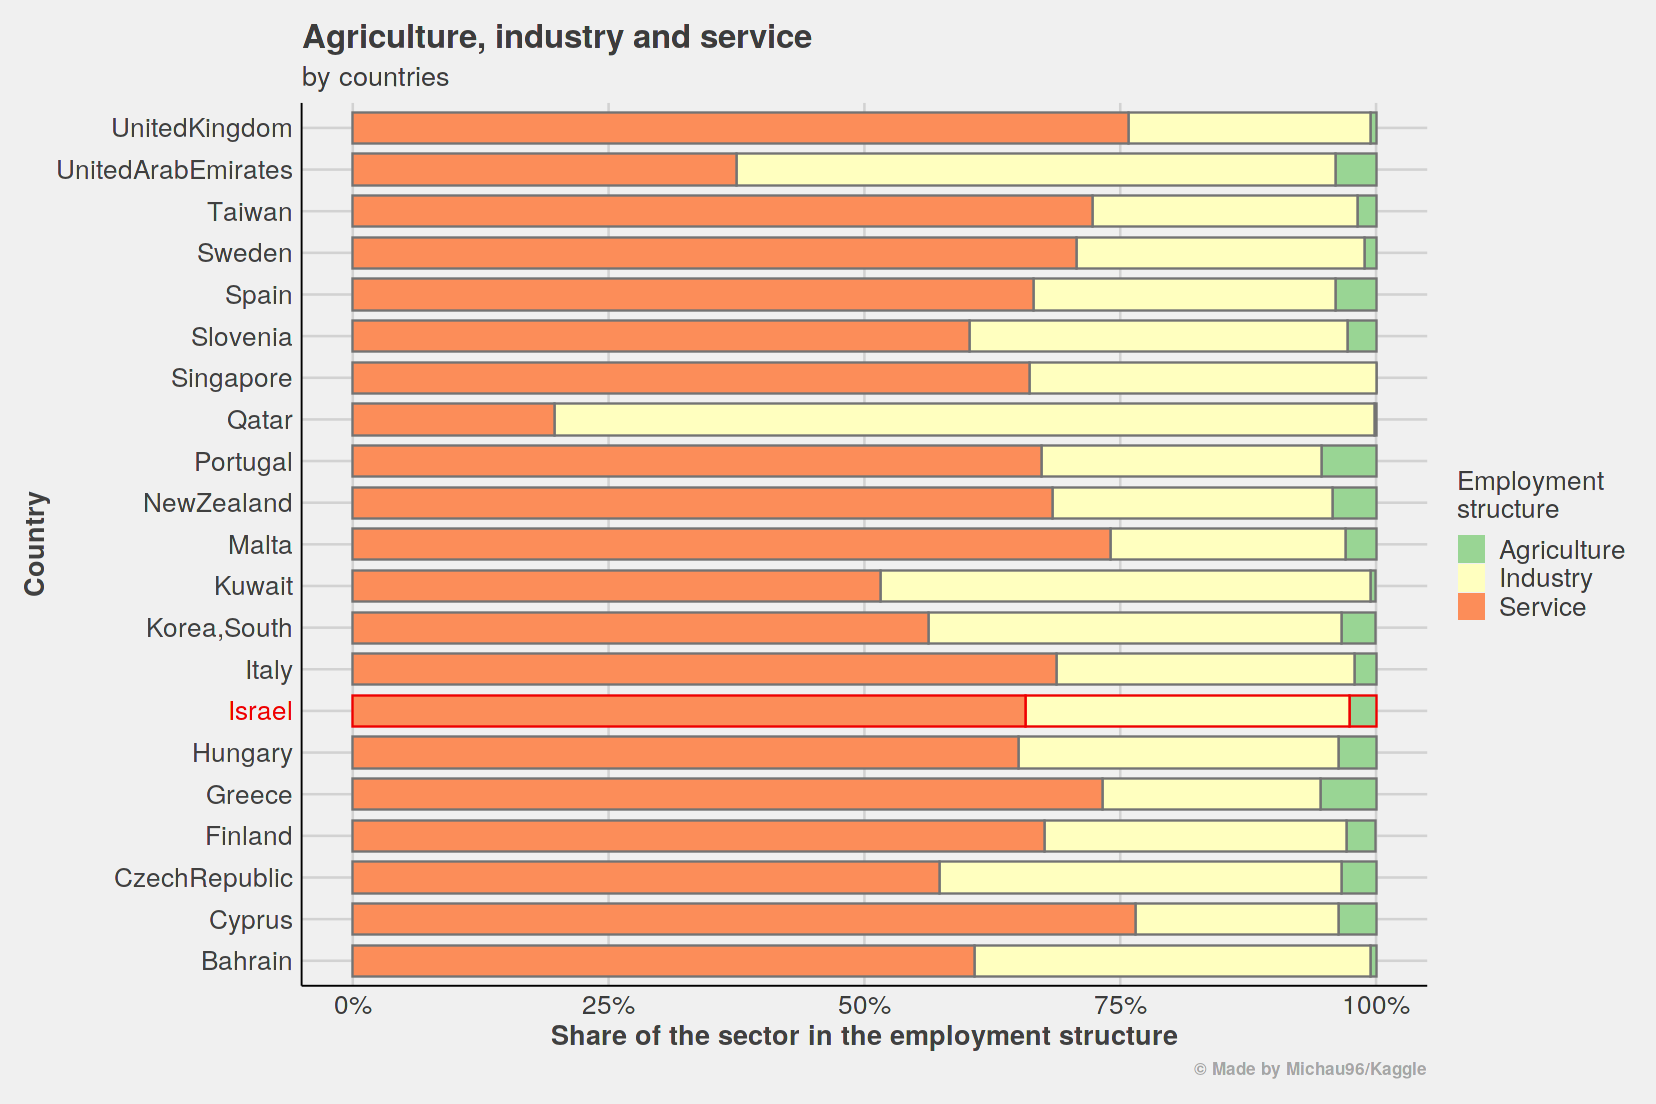

In [15]:
gosp <- other %>%
  select(region, Agriculture, Industry, Service) %>%
  filter(is.na(Agriculture)==F) %>%
  filter(is.na(Industry)==F) %>%
  filter(is.na(Service)==F) %>%
  melt(., id.vars = "region") 

gosp <- gosp[gosp$region %in% c("Israel", "Sweden", "Italy", "Singapore", "Taiwan", "UnitedArabEmirates", 
"Spain", "NewZealand", "Qatar","Greece", "Cyprus", "Kuwait", "Slovenia", "Portugal", "Korea,South", 
"Malta", "Bahrain", "Finland", "CzechRepublic", "Hungary", "UnitedKingdom"),]

gosp$israel <- ifelse(gosp$region=="Israel","Israel", "Rest of World")
a <- ifelse(gosp$region=="Israel","red2", "gray25")

ggplot(gosp, aes(region, color = israel, weight = value))+
  geom_bar(aes(fill = variable), width = 0.75)+
  scale_fill_brewer(palette = "Spectral", direction = -1)+
  scale_colour_manual(values = c("red2", "gray45"), guide = F)+
  scale_y_continuous(labels = scales::percent_format(accuracy = 1))+
  coord_flip()+
  labs(x = "Country", y = "Share of the sector in the employment structure", title = "Agriculture, industry and service",
       colour = "Country", fill = "Employment\nstructure", subtitle = "by countries", caption = "© Made by Michau96/Kaggle")+
  theme_fivethirtyeight()+
  theme_michau+
  theme(legend.position = "right", legend.direction = "vertical", axis.text.y = element_text(colour = a))

<p style="text-align: justify">Next we look at countries in the structure of the economy, i.e. the share of agriculture, industry and services in employment. Due to the large number of countries, the chart is limited to a dozen or so countries with the closest GDP, excluding very small countries (mainly island countries) from this group. All of the represented countries (except two) are more than half employed in services, including Israel. Nearby Qatar and the United Arab Emirates have a much larger share of industry than other countries. All countries have a very small share of agriculture in their employment. Israel doesn't differ completely from the structure of employment of the population from the average profile of the country, the labor market is certainly not atypical in this country. The poor correlation of variables (participation of people in services and industry) with the number of vaccinated people per population also indicates that this is not a feature that influences the situation with vaccinations.</p>

**Conclusions:**

<p style="text-align: justify">The aim of the analysis was to find in the selected data the reasons why Israel is so good at vaccination. We approached the subject from two sides: analyzing vaccination data between countries and looking for other variables (including economic, demographic, etc.) in which Israel stands out, looking for variables that may affect the vaccination system in this country in the Middle East.</p>

<p style="text-align: justify">It turns out that it's extremely difficult to find features that contribute to becoming a leader, even if only to a moderate extent. Certainly Israel is in such a high position today as it began mass vaccination the fastest and continues to maintain a good pace. Such a quick action could have been helped by a not very large area and number of inhabitants as well as GDP above average values, but these are not key factors, as other countries with similar parameters are doing much worse. Perhaps there are other variables that distinguish Israel to a much greater extent, and perhaps it isn't a question of the economic and social profile of the country but of the reasons given by the media, such as political goals of the current government, a broad information campaign or moblization resulting from the very difficult epidemic situation in the fall. New data are coming in every day, and Israel is slowly losing its leadership position and probably won't be the first country to vaccinate 80% or more of the population, but it still remains in the lead.</p>

References:


1. https://www.tidyverse.org/packages/
2. https://yutani.rbind.io/post/2018-06-03-anatomy-of-gghighlight/
3. https://en.wikipedia.org/wiki/Israel
4. https://www.kaggle.com/worldbank/world-development-indicators
5. https://www.kaggle.com/gpreda/covid-world-vaccination-progress
6. https://www.nytimes.com/2021/01/01/world/middleeast/israel-coronavirus-vaccines.html
7. https://abcnews.go.com/Health/wireStory/israel-global-leader-covid-vaccinations-finds-limits-75701096
8. http://www.sthda.com/english/wiki/ggcorrplot-visualization-of-a-correlation-matrix-using-ggplot2
9. https://www.timesofisrael.com/israel-says-vaccine-dramatically-effective-prevents-98-9-of-covid-deaths/

**Thanks for reading my kernal!**

**If you have any suggestions for improving the analysis, let me know in the comment!**

**If you appreciate my work in this notebook, give upvote!**

**If you have a moment, I recommend looking at my other [projects](https://www.kaggle.com/michau96/notebooks).**